# Predicting Song Popularity by Region

I aim to predict the popularity of a song in relation to different countries. To do this, I will group the countries into larger regions such as Western Europe, Scandinavia, and other subdivisions. The respective region can be derived from the country column.

## Musical Attributes for Analysis

To determine the popularity of a song, I will analyze the following musical attributes:

- **Liveness**: Detects the presence of an audience in the recording. Higher liveness values suggest that the track was recorded in a live performance setting with audible audience sounds. Values closer to 1.0 indicate a strong live presence, while values closer to 0.0 suggest a studio recording.
- **Valence**: Measures the musical positivity conveyed by a track. A higher valence (closer to 1.0) means the song sounds more happy, cheerful, and euphoric. A lower valence (closer to 0.0) makes the song sound more sad, depressed, or angry.
- **Tempo**: The speed of the song in beats per minute (BPM).
- **Loudness**: The average loudness of a song in decibels.
- **Key**: The musical key of the song.
- **Energy**: A measure of the intensity and activity of a song.
- **Danceability**: How suitable the song is for dancing.
- **Speechiness**: The proportion of spoken words in the song.
- **Acousticness**: Indicates whether the song contains acoustic instruments.

## Potential Issues

One potential problem is that I am not accounting for the popularity of the respective artist. It is likely that well-known artists are more likely to appear in the charts than lesser-known ones, which could influence the prediction. However, this dataset does not include such information, and reliably supplementing this data would require significant additional effort.

Another issue I see is recency bias, with freshly released albums getting the release hype and thus rising in the charts. I'm not sure how I should counter that, so I don't plan to take any of that into consideration; however, I might still do it if I find the time at the end.


# 2.2 

I've decided upon using the median, standard deviation and the percentage of the values (exluding outliers = top / bottom 5 or so percent)
I'll use those informations for every category of data.

In [1]:
!pip install matplotlib
!pip install scipy
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\flori\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\flori\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\flori\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# 2.2
import pandas as pd
import numpy as np
import os

# Load the data
data = pd.read_csv(r'C:\Users\flori\Downloads\lb 259\data.csv')

# List of relevant numerical fields
relevant_fields = [
    'popularity', 'danceability', 'energy', 'loudness', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

# Calculate median, standard deviation, and percentage of values (excluding outliers)
statistics = {}
for field in relevant_fields:
    # Drop missing values
    field_data = data[field].dropna()
    
    # Calculate median and standard deviation
    median = np.median(field_data)
    std_dev = np.std(field_data)
    
    # Exclude outliers (top and bottom 5%)
    lower_bound = np.percentile(field_data, 10)
    upper_bound = np.percentile(field_data, 90)
    filtered_data = field_data[(field_data >= lower_bound) & (field_data <= upper_bound)]
    
    # Calculate the percentage of values within the filtered range
    percentage_within_range = (len(filtered_data) / len(field_data)) * 100
    
    # Store the results
    statistics[field] = {
        'Median': median,
        'Standard Deviation': std_dev,
        'Percentage': percentage_within_range
    }

# Output the statistical information
print("\nStatistical Information:")
for field, stats in statistics.items():
    print(f"{field}:")
    print(f"  Median: {stats['Median']}")
    print(f"  Standard Deviation: {stats['Standard Deviation']}")
    print(f"  Percentage within 5%-95% range: {stats['Percentage']:.2f}%")


Statistical Information:
popularity:
  Median: 84.0
  Standard Deviation: 14.182223307670936
  Percentage within 5%-95% range: 81.72%
danceability:
  Median: 0.678
  Standard Deviation: 0.17614881721408845
  Percentage within 5%-95% range: 80.32%
energy:
  Median: 0.656
  Standard Deviation: 0.21687045789490417
  Percentage within 5%-95% range: 80.62%
loudness:
  Median: -5.96
  Standard Deviation: 8.945134567735343
  Percentage within 5%-95% range: 81.02%
speechiness:
  Median: 0.0615
  Standard Deviation: 0.1105068951306808
  Percentage within 5%-95% range: 80.32%
acousticness:
  Median: 0.182
  Standard Deviation: 0.24973339496086844
  Percentage within 5%-95% range: 80.42%
instrumentalness:
  Median: 4.26e-06
  Standard Deviation: 0.22947068827745123
  Percentage within 5%-95% range: 90.01%
liveness:
  Median: 0.122
  Standard Deviation: 0.13689240028285116
  Percentage within 5%-95% range: 80.92%
valence:
  Median: 0.536
  Standard Deviation: 0.25982611766761426
  Percentage with

In [3]:
# 2.4
from sklearn.preprocessing import MinMaxScaler

# Skalierer erstellen
scaler = MinMaxScaler()

# Loudness skalieren
data['loudness_scaled'] = scaler.fit_transform(data[['loudness']])

# Ergebnisse anzeigen
print(data[['loudness', 'loudness_scaled']].head())

   loudness  loudness_scaled
0    -4.667         0.911885
1    -2.888         0.944542
2    -5.112         0.903716
3   -30.487         0.437897
4    -6.795         0.872820


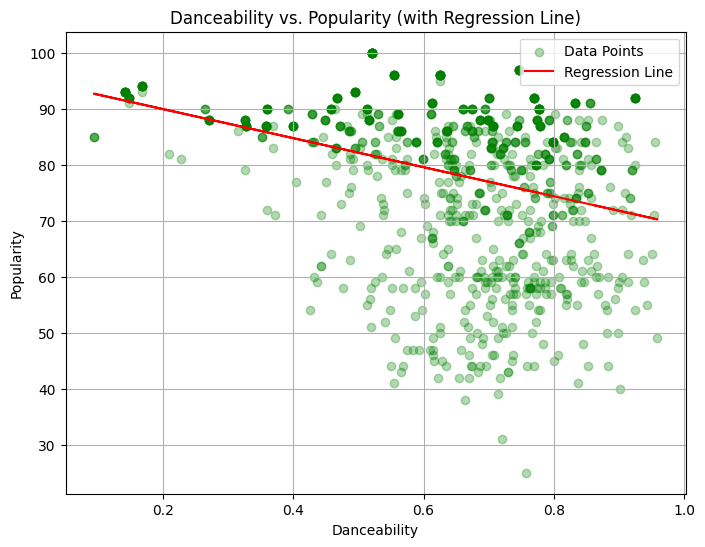

In [5]:
# 2.3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress  # For the regression line

# Load the data
data = pd.read_csv(r'C:\Users\flori\Downloads\lb 259\data.csv')

# Scatter plot with regression line for 'danceability' vs. 'popularity'
plt.figure(figsize=(8, 6))

# Create the scatter plot
plt.scatter(data['danceability'], data['popularity'], alpha=0.3, color='green', label='Data Points')

# Calculate and plot the regression line
slope, intercept, r_value, p_value, std_err = linregress(data['danceability'].dropna(), data['popularity'].dropna())
plt.plot(data['danceability'], slope * data['danceability'] + intercept, color='red', label='Regression Line')

plt.title('Danceability vs. Popularity (with Regression Line)')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.legend()
plt.grid(True)
plt.show()